In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
titanic = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/main/day%203/titanic.csv')
titanic.head()

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0000,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male
3,4,1st,0,"Allison, Mrs Hudson J.C. (Bessie Waldo Daniels)",25.0000,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
4,5,1st,1,"Allison, Master Hudson Trevor",0.9167,Southampton,"Montreal, PQ / Chesterville, ON",C22,NaN,11,male


In [34]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   row.names  1313 non-null   int64  
 1   pclass     1313 non-null   object 
 2   survived   1313 non-null   int64  
 3   name       1313 non-null   object 
 4   age        633 non-null    float64
 5   embarked   821 non-null    object 
 6   home.dest  754 non-null    object 
 7   room       77 non-null     object 
 8   ticket     69 non-null     object 
 9   boat       347 non-null    object 
 10  sex        1313 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 113.0+ KB


In [35]:
titanic.drop(['row.names' , 'name' , 'ticket' , 'room', 'boat', 'home.dest'] , axis=1 , inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1313 non-null   object 
 1   survived  1313 non-null   int64  
 2   age       633 non-null    float64
 3   embarked  821 non-null    object 
 4   sex       1313 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [37]:
titanic['age'].fillna(titanic['age'].median() , inplace=True)
titanic['embarked'].fillna(titanic['embarked'].mode().values[0] , inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1313 non-null   object 
 1   survived  1313 non-null   int64  
 2   age       1313 non-null   float64
 3   embarked  1313 non-null   object 
 4   sex       1313 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 51.4+ KB


In [38]:
titanic.head()

,pclass,survived,age,embarked,sex
0,1st,1,29.0000,Southampton,female
1,1st,0,2.0000,Southampton,female
2,1st,0,30.0000,Southampton,male
3,1st,0,25.0000,Southampton,female
4,1st,1,0.9167,Southampton,male


In [39]:
titanic.duplicated().sum()

912

In [40]:
titanic.drop_duplicates(inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401 entries, 0 to 839
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    401 non-null    object 
 1   survived  401 non-null    int64  
 2   age       401 non-null    float64
 3   embarked  401 non-null    object 
 4   sex       401 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 18.8+ KB


In [41]:
titanic[['pclass' , 'survived']].groupby(['pclass'] , as_index=False).mean().sort_values(by='survived' , ascending=False)

,pclass,survived
0,1st,0.603659
1,2nd,0.522124
2,3rd,0.314516


In [42]:
titanic[['sex' , 'survived']].groupby(['sex'] , as_index=False).mean().sort_values(by='survived' , ascending=False)

,sex,survived
0,female,0.739884
1,male,0.302632


In [43]:
import seaborn as sns

In [44]:
cat_cols = list(titanic.select_dtypes(include='object').columns)
num_cols = list(titanic.select_dtypes(exclude='object').columns)
num_cols.remove('survived')

print(cat_cols , num_cols)

['pclass', 'embarked', 'sex'] ['age']


<Figure size 864x576 with 0 Axes>

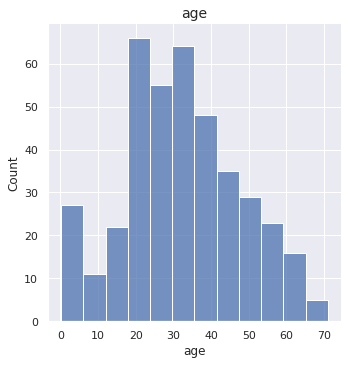

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


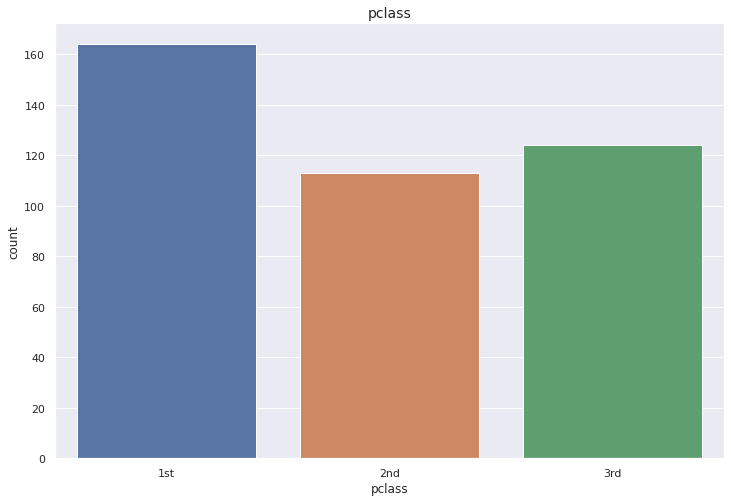

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


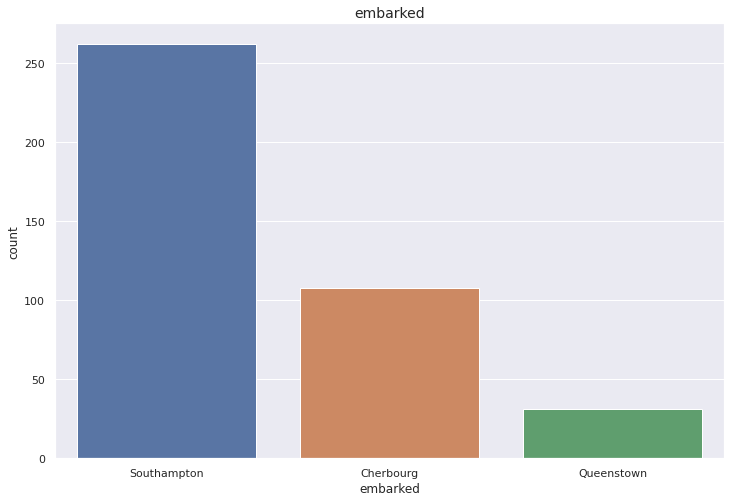

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


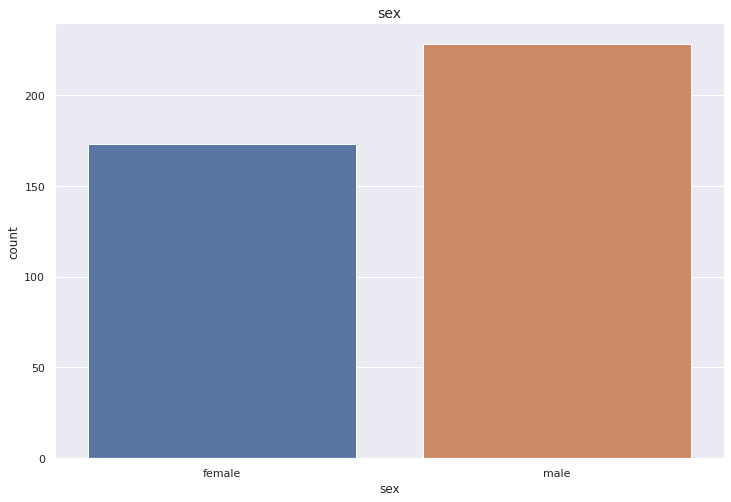

In [45]:
sns.set()

for n in num_cols:
    plt.figure(figsize=(12,8))
    sns.displot(titanic[n])
    plt.title(f'{n}' , size=14)
    plt.show()
    
for c in cat_cols:
    plt.figure(figsize=(12,8))
    ax = sns.countplot(titanic[c])
        
    plt.title(f'{c}' , size=14)
    plt.show()

Text(0.5, 1.0, 'Male/Female Ages')

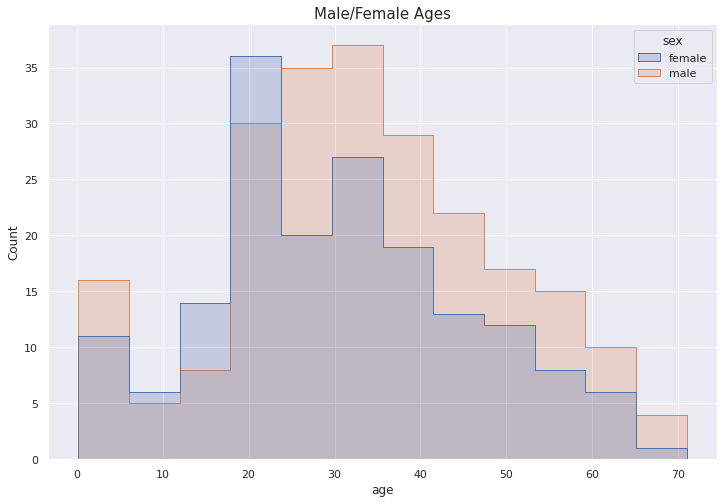

In [46]:
plt.figure(figsize=(12, 8))
sns.histplot(x=titanic.age, hue=titanic.sex, element='step')
plt.title('Male/Female Ages' , size=15)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1296x864 with 0 Axes>

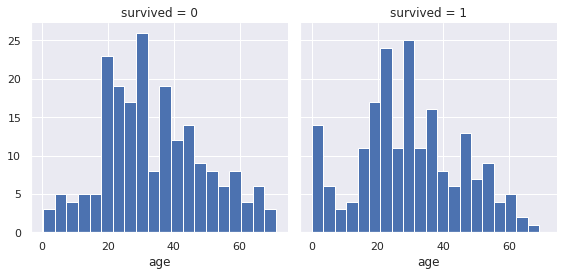

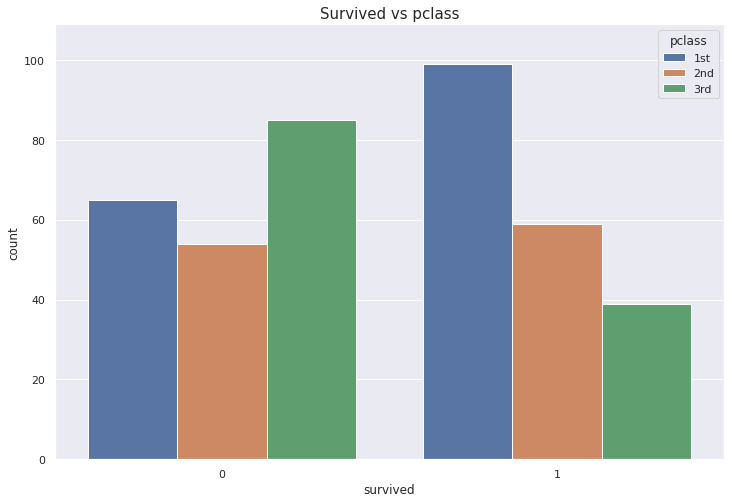

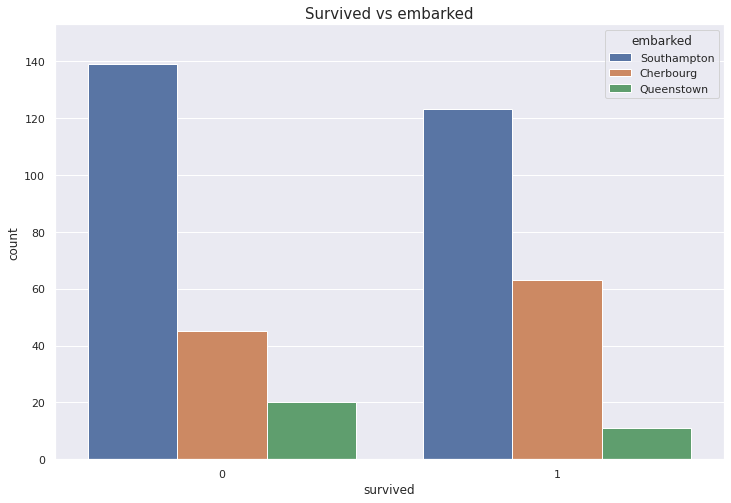

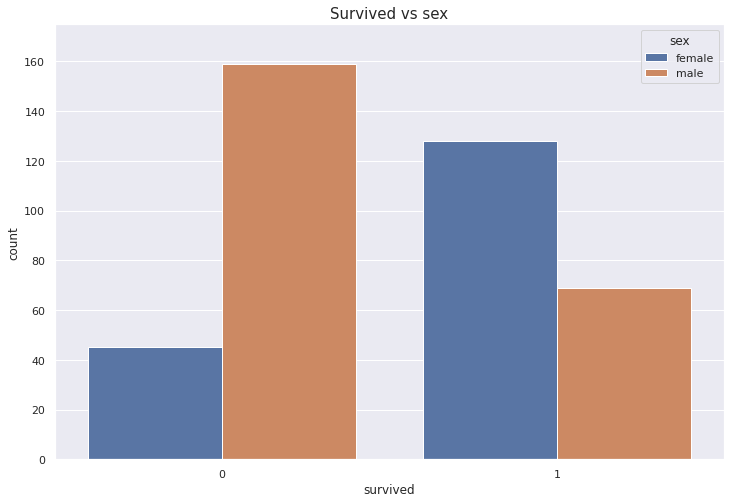

In [47]:
for n in num_cols:
    plt.figure(figsize=(18,12))
    g = sns.FacetGrid(titanic , col='survived' , size=4)
    g.map(plt.hist, n , bins=20)
    
    #plt.title(f"{n} vs Survived", size=15)
    plt.show()

for c in cat_cols:
    plt.figure(figsize=(12,8))
    ax = sns.countplot(x=titanic.survived, hue=titanic[c])
    
    ax.margins(y=0.1)
    
    plt.title(f"Survived vs {c}", size=15)
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


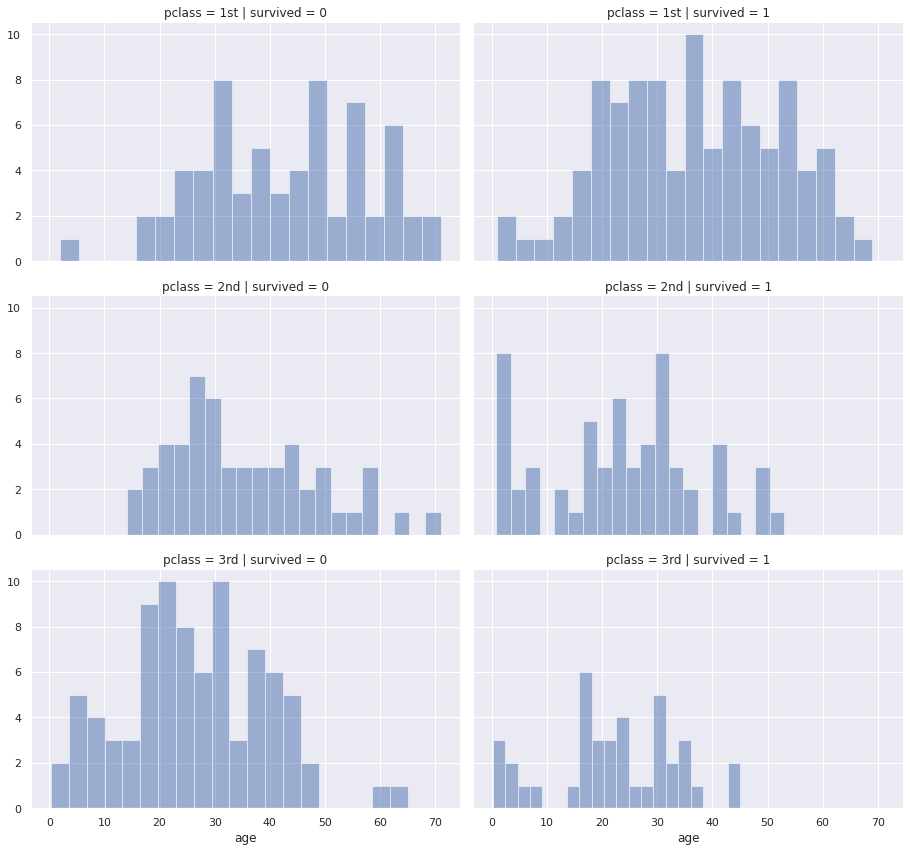

In [49]:
grid = sns.FacetGrid(titanic, col='survived', row='pclass', size=4, aspect=1.6)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
plt.show()

In [68]:
X = titanic.drop('survived' , axis=1)
y = titanic['survived']

In [69]:
X = pd.get_dummies(X , columns=['sex' , 'embarked', 'pclass'])
X.head()

,age,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton,pclass_1st,pclass_2nd,pclass_3rd
0,29.0000,1,0,0,0,1,1,0,0
1,2.0000,1,0,0,0,1,1,0,0
2,30.0000,0,1,0,0,1,1,0,0
3,25.0000,1,0,0,0,1,1,0,0
4,0.9167,0,1,0,0,1,1,0,0


In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [71]:
sc = StandardScaler()

X[['age']] = sc.fit_transform(X[['age']])
X.head()

,age,sex_female,sex_male,embarked_Cherbourg,embarked_Queenstown,embarked_Southampton,pclass_1st,pclass_2nd,pclass_3rd
0,-0.187359,1,0,0,0,1,1,0,0
1,-1.910718,1,0,0,0,1,1,0,0
2,-0.123531,0,1,0,0,1,1,0,0
3,-0.442672,1,0,0,0,1,1,0,0
4,-1.979863,0,1,0,0,1,1,0,0


In [72]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.25)

In [73]:
rf = RandomForestClassifier()   #(**rfc_params)
rf.fit(X_train, y_train)

rfpred = rf.predict(X_test)

rfscore = accuracy_score(y_test , rfpred)
print('Accuracy Score = ' , rfscore)

Accuracy Score =  0.5643564356435643


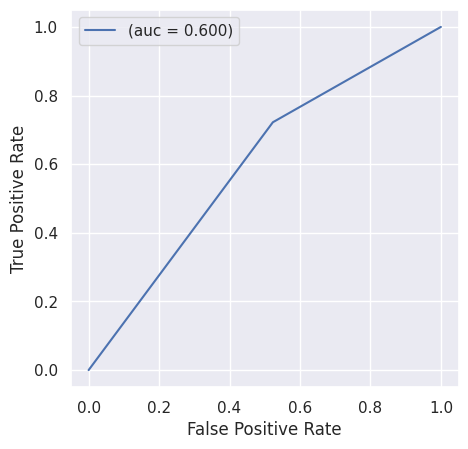

In [74]:
from sklearn.metrics import classification_report , roc_curve , auc

fpr,tpr,threshold =roc_curve(y_test,rfpred)
rfauc = auc(fpr,tpr)
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % rfauc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

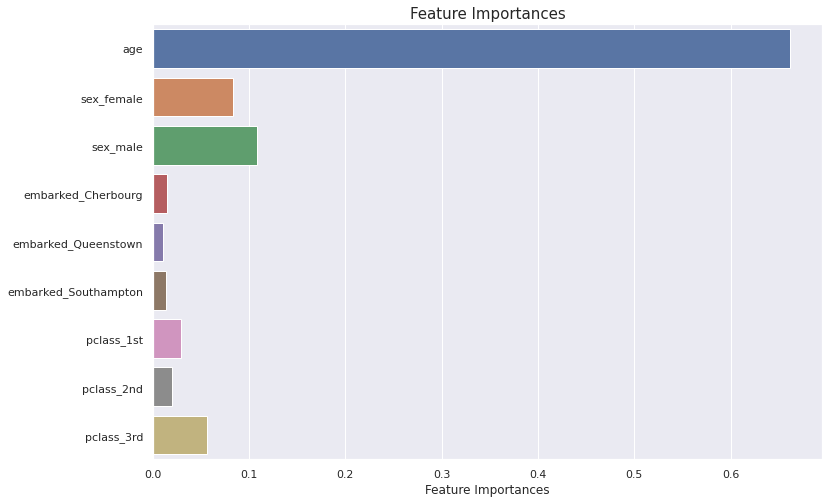

In [75]:
f_imp = pd.DataFrame({"Feature Importances": rf.feature_importances_}, index=X.columns)

plt.figure(figsize=(12,8))
sns.barplot(x=f_imp["Feature Importances"], y=f_imp.index)
plt.title(f"Feature Importances", size=15)
plt.show()

In [77]:
rf = RandomForestClassifier(max_features='auto', oob_score=True, random_state=1, n_jobs=-1)

param_grid = { 
    "criterion" : ["gini", "entropy"], 
    "min_samples_leaf" : [1, 5, 10], 
    # "min_samples_split" : [2, 10, 16], 
    "n_estimators": [50, 400, 1000]
    }

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)

gs = gs.fit(X_train, y_train)

AttributeError: ignored

In [80]:
print(gs.best_score_)
print(gs.best_params_)

0.6766666666666666
{'criterion': 'entropy', 'min_samples_leaf': 5, 'n_estimators': 50}
